# Machine Failure classification project

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Target - Machine failure

In [3]:
df["Machine failure"].unique()

array([0, 1])

1. 0 - Machine running properly
2. 1 - Machine Failed

In [4]:
df["Machine failure"].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

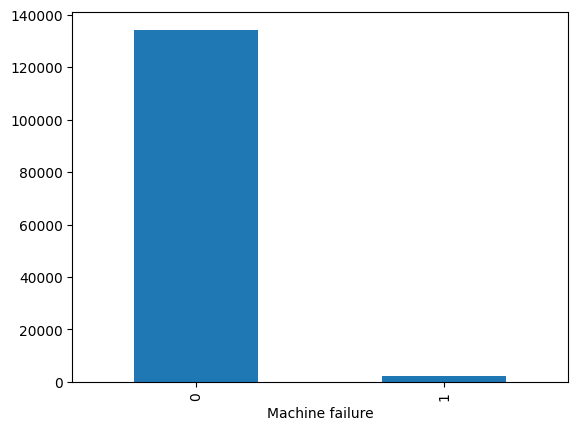

In [5]:
df["Machine failure"].value_counts().plot(kind="bar")

# Step 2 - Perfom Basic Data quality checks

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

# Step 3 - Seperate X and Y(Machine failure)
drop Id and Product ID (too many unique values)

In [10]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df["Machine failure"]

In [11]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [12]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

# Step 4 - Apply Preprocessing on X

In [13]:
import os
import sys

sys.path.append(os.path.abspath(".."))

In [14]:
from utils import preprocess_data

X_pre, pre = preprocess_data(X)

In [15]:
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [16]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

# Step 5 - Apply Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=21
)

In [18]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
29391,-0.194806,0.620091,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
111006,0.073688,1.053251,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
16102,0.288483,0.475704,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
110599,1.040265,0.764477,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
84638,2.114241,2.280539,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [19]:
ytrain.head()

29391     0
111006    0
16102     0
110599    0
84638     0
Name: Machine failure, dtype: int64

In [20]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
22333,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
35216,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
112970,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
14905,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0
25676,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0


In [21]:
ytest.head()

22333     0
35216     0
112970    0
14905     0
25676     0
Name: Machine failure, dtype: int64

# Step 6 - Algo Evaluation

In [22]:
!uv add xgboost

Resolved 141 packages in 50ms
Audited 135 packages in 2ms


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

In [24]:
models = [
    LogisticRegression(random_state=42),
    LogisticRegression(random_state=42, class_weight="balanced"),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    HistGradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(max_depth=4, random_state=42),
]

In [25]:
xtrain.columns

Index(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF', 'num__OSF',
       'num__RNF', 'cat__Type_L', 'cat__Type_M'],
      dtype='object')

In [26]:
xtrain.values

array([[-0.1948061 ,  0.62009052, -0.22583239, ..., -0.04756777,
         1.        ,  0.        ],
       [ 0.07368772,  1.05325097,  0.37242564, ..., -0.04756777,
         1.        ,  0.        ],
       [ 0.28848277,  0.4757037 , -0.65830807, ..., -0.04756777,
         1.        ,  0.        ],
       ...,
       [ 1.57725311,  0.33131689, -0.21141653, ..., -0.04756777,
         1.        ,  0.        ],
       [ 2.22163828,  2.28053892, -0.46369401, ..., -0.04756777,
         1.        ,  0.        ],
       [ 1.41615682,  0.4035103 ,  1.08601052, ..., -0.04756777,
         1.        ,  0.        ]], shape=(109143, 12))

In [27]:
from utils import algorithm_evaluation

best_model, eval_df = algorithm_evaluation(
    models, xtrain.values, ytrain.values, xtest.values, ytest.values
)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(random_state=42), 'f1_train': 0.9314, 'f1_test': 0.9255, 'f1_cv': np.float64(0.931)}


{'model_name': 'LogisticRegression', 'model': LogisticRegression(class_weight='balanced', random_state=42), 'f1_train': 0.7909, 'f1_test': 0.7941, 'f1_cv': np.float64(0.7903)}


{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(random_state=42), 'f1_train': 0.9978, 'f1_test': 0.8725, 'f1_cv': np.float64(0.8761)}


{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(random_state=42), 'f1_train': 0.9978, 'f1_test': 0.9268, 'f1_cv': np.float64(0.9302)}


{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(random_state=42), 'f1_train': 0.9329, 'f1_test': 0.9232, 'f1_cv': np.float64(0.9288)}


{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
        

In [28]:
best_model

LogisticRegression(random_state=42)

In [29]:
eval_df

,model_name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(random_state=42),0.9314,0.9255,0.9310
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9978,0.9268,0.9302
2,HistGradientBoostingClassifier,HistGradientBoostingClassifier(random_state=42),0.9329,0.9232,0.9288
3,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9395,0.9253,0.9284
4,DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),0.9978,0.8725,0.8761
5,LogisticRegression,"LogisticRegression(class_weight='balanced', ra...",0.7909,0.7941,0.7903


In [30]:
eval_df.to_csv("evaluation.csv", index=False)

# Logistic Regression is selected as it has higest score in cross validation

# Step 7 - Evaluate model in detail

In [31]:
# Accuracy in train
best_model.score(xtrain, ytrain)

0.996225135830974

In [32]:
# Accuracy in test
best_model.score(xtest, ytest)

0.9959319797698454

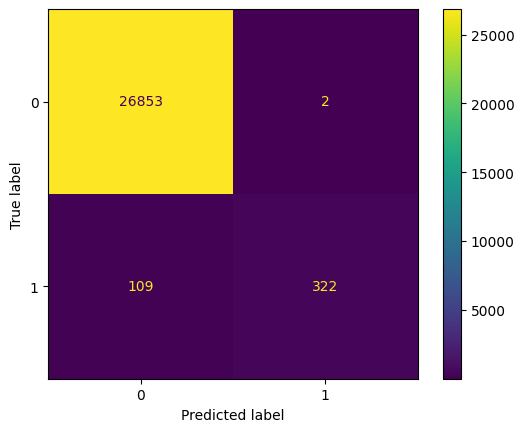

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [35]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [36]:
ytest.head()

22333     0
35216     0
112970    0
14905     0
25676     0
Name: Machine failure, dtype: int64

In [37]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       0.99      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       0.99      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



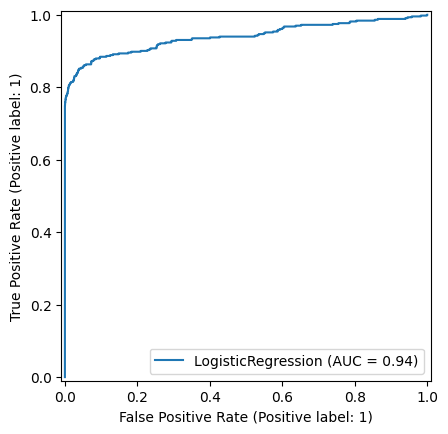

In [38]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest, ytest)

# From above results it is clear that we can use this model for out of sample prediction

# Step 8 - Out of Sample prediction

In [39]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [40]:
xnew.shape

(90954, 13)

In [41]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [42]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [43]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [45]:
best_model.classes_

array([0, 1])

In [46]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.00227482, 0.00125161, 0.00278857, 0.00400776, 0.00415117])

In [47]:
res = xnew[["id"]]
res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [48]:
res["machine_failure"] = preds
res["probability"] = probs.round(4)

In [49]:
res

,id,machine_failure,probability
0,136429,0,0.0023
1,136430,0,0.0013
2,136431,0,0.0028
3,136432,0,0.0040
4,136433,0,0.0042
...,...,...,...
90949,227378,0,0.0026
90950,227379,0,0.0005
90951,227380,0,0.0029
90952,227381,0,0.0027


In [50]:
res["machine_failure"].value_counts()

machine_failure
0    89848
1     1106
Name: count, dtype: int64

<Axes: title={'center': 'Model Predictions on out of sample data'}, xlabel='machine_failure'>

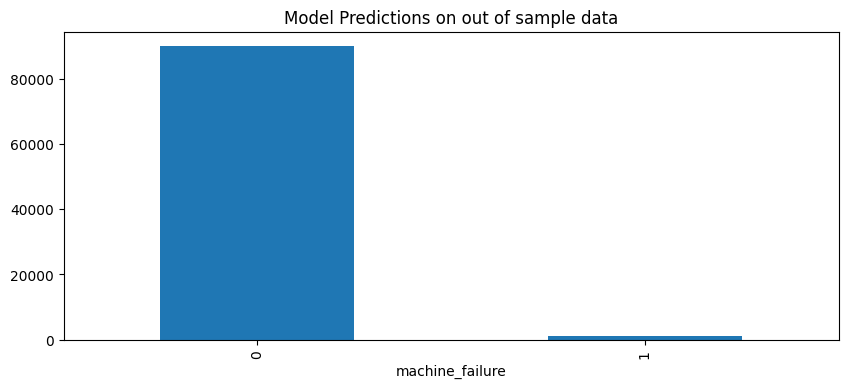

In [52]:
res["machine_failure"].value_counts().plot(
    kind="bar", figsize=(10, 4), title="Model Predictions on out of sample data"
)

In [53]:
res.to_csv("results.csv", index=False)

In [54]:
res[res["machine_failure"] == 1]

,id,machine_failure,probability
17,136446,1,0.9939
209,136638,1,0.9970
223,136652,1,0.9885
397,136826,1,0.9967
405,136834,1,0.9949
...,...,...,...
90503,226932,1,0.9897
90665,227094,1,0.9993
90679,227108,1,0.7386
90784,227213,1,0.9862


# Step 9 - Save model object and preprocessor

In [55]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [56]:
best_model

LogisticRegression(random_state=42)

In [57]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [58]:
joblib.dump(best_model, "machine_model.joblib")

['machine_model.joblib']

# Loading the objects

In [59]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [60]:
m = joblib.load("machine_model.joblib")
m

LogisticRegression(random_state=42)

In [61]:
m.score(xtrain, ytrain)

0.996225135830974

In [62]:
m.score(xtest, ytest)

0.9959319797698454